# EDA Using Plotter and DataFrameTransform Classes
This notebook contains the transformations applied to the the data from the __Plotter__ and __DataFrameTransform__ classes.

### 1. Import Packages
There are several packages that need to be installed before the data can be loaded and transformed.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import yeojohnson
from matplotlib import pyplot 

### 2. Load Data and Prepare for EDA
In this step, the data is loaded and prepared for the final step of EDA using the previously created classes.

In [22]:
# Load in data
loan_data = pd.read_csv('loan_payment.csv')

# Transform datatype of columns
from Classes.DataTransform_class import DataTransform
DataTransform_data = DataTransform(loan_data)
DataTransform_data.all_transformations()

# Import class for extracting data
from Classes.DataFrameInfo_class import DataFrameInfo
DataFrameInfo_data = DataFrameInfo(DataTransform_data.data)

/Users/shreeyarathod/EDA/exploratory-data-analysis---customer-loans-in-finance/Classes/DataTransform_class.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['issue_date'] = pd.to_datetime(self.data['issue_date'])
/Users/shreeyarathod/EDA/exploratory-data-analysis---customer-loans-in-finance/Classes/DataTransform_class.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['earliest_credit_line'] = pd.to_datetime(self.data['earliest_credit_line'])
/Users/shreeyarathod/EDA/exploratory-data-analysis---customer-loans-in-finance/Classes/DataTransform_class.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is con

### 3. Use DataFrameInfo Class
The instance for the __DataFrameInfo__ class has been created and will be used to check the percentage of missing values in each variable and their corresponding mean and median values.

In [23]:
DataFrameInfo_data.percentage_of_NULL_values()

The percentage of NULL values is: 
id                             0.000000
member_id                      0.000000
loan_amount                    0.000000
funded_amount                  0.055448
funded_amount_inv              0.000000
term                           0.000000
int_rate                       0.095314
instalment                     0.000000
grade                          0.000000
sub_grade                      0.000000
employment_length              0.039055
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_date                     0.000000
loan_status                    0.000000
payment_plan                   0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_credit_line           0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq         0.571666
mths_since_last_record         0.886025
open_

In [24]:
# Explore the mean of the variables with missing values using:
DataFrameInfo_data.mean_of_variable()

# Here I have used funded_amount as an example

Mean of funded_amount is: 13229.50911682024

Data for funded_amount is: 
0         8000.0
1        13200.0
2        16000.0
3        15000.0
4        15000.0
          ...   
54226     5000.0
54227     5000.0
54228     3500.0
54229     5000.0
54230     5000.0
Name: funded_amount, Length: 54231, dtype: float64


In [5]:
# Explore the median of the variables with missing values using:
DataFrameInfo_data.median_of_variable()

# Here I have used funded_amount as an example

Median of funded_amount is: 12000.0

Data for funded_amount is: 
0         8000.0
1        13200.0
2        16000.0
3        15000.0
4        15000.0
          ...   
54226     5000.0
54227     5000.0
54228     3500.0
54229     5000.0
54230     5000.0
Name: funded_amount, Length: 54231, dtype: float64


Now that the missing values, means amd medians of the variables have been explored, I can now begin to remove missing values and input the mean or median in their place.

In [25]:
DataFrameInfo_data.data

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,A4,...,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,A3,...,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36,7.49,497.63,A,A4,...,0.00,0.00,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36,14.31,514.93,C,C4,...,0.00,0.00,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,A1,...,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36,9.01,159.03,B,B2,...,0.00,0.00,2016-07-01,160.61,NaT,2016-07-01,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36,10.59,162.73,C,C2,...,0.00,0.00,2016-10-01,490.01,NaT,2016-09-01,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36,7.43,108.77,A,A2,...,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36,7.43,155.38,A,A2,...,0.00,0.00,2014-03-01,0.00,NaT,2013-05-01,NaN,NaN,1,INDIVIDUAL


## 4. Removing and Imputing Missing Values
The purpose of this step is to use the knowledge that I have acquired in the previous steps and apply them to remove or input missing values.

Use both the __DataFrameTransform__ class and the __Plotter__ class to help visualise and apply transformations.

In [26]:
# Import class for transforming the missing values in the dataframe
from Classes.Plotter_and_DataFrameTransform import DataFrameTransform

# Create an instance for this class
DataFrameTransform_data = DataFrameTransform(DataFrameInfo_data.data)

### A. Remove Missing Values
The class has already got a method which removes all missing values that are not useful for us.

In [27]:
DataFrameTransform_data.drop_all()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,last_payment_date,last_payment_amount,last_credit_pull_date
0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,A4,...,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,2022-01-01,248.82,2022-01-01
1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,A3,...,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,2022-01-01,407.52,2022-01-01
2,38656154,41439961,16000,16000.0,16000.0,36,7.49,497.63,A,A4,...,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,2021-10-01,12850.16,2021-10-01
3,38656128,41439934,15000,15000.0,15000.0,36,14.31,514.93,C,C4,...,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,2021-06-01,13899.67,2021-06-01
4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,A1,...,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,2022-01-01,456.54,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36,9.01,159.03,B,B2,...,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,2016-07-01,160.61,2016-07-01
54227,142608,74724,5000,5000.0,2350.0,36,10.59,162.73,C,C2,...,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,2016-10-01,490.01,2016-09-01
54228,117045,70978,3500,3500.0,2225.0,36,7.43,108.77,A,A2,...,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,2016-09-01,110.58,2013-05-01
54229,88854,70699,5000,5000.0,225.0,36,7.43,155.38,A,A2,...,2,0.00,0.00,5174.18,232.84,5000.00,174.18,2014-03-01,0.00,2013-05-01


In [28]:
# Import class for transforming the missing values in the dataframe
from Classes.Plotter_and_DataFrameTransform import Plotter

# Create an instance for the class
plots = Plotter(DataFrameTransform_data.data)

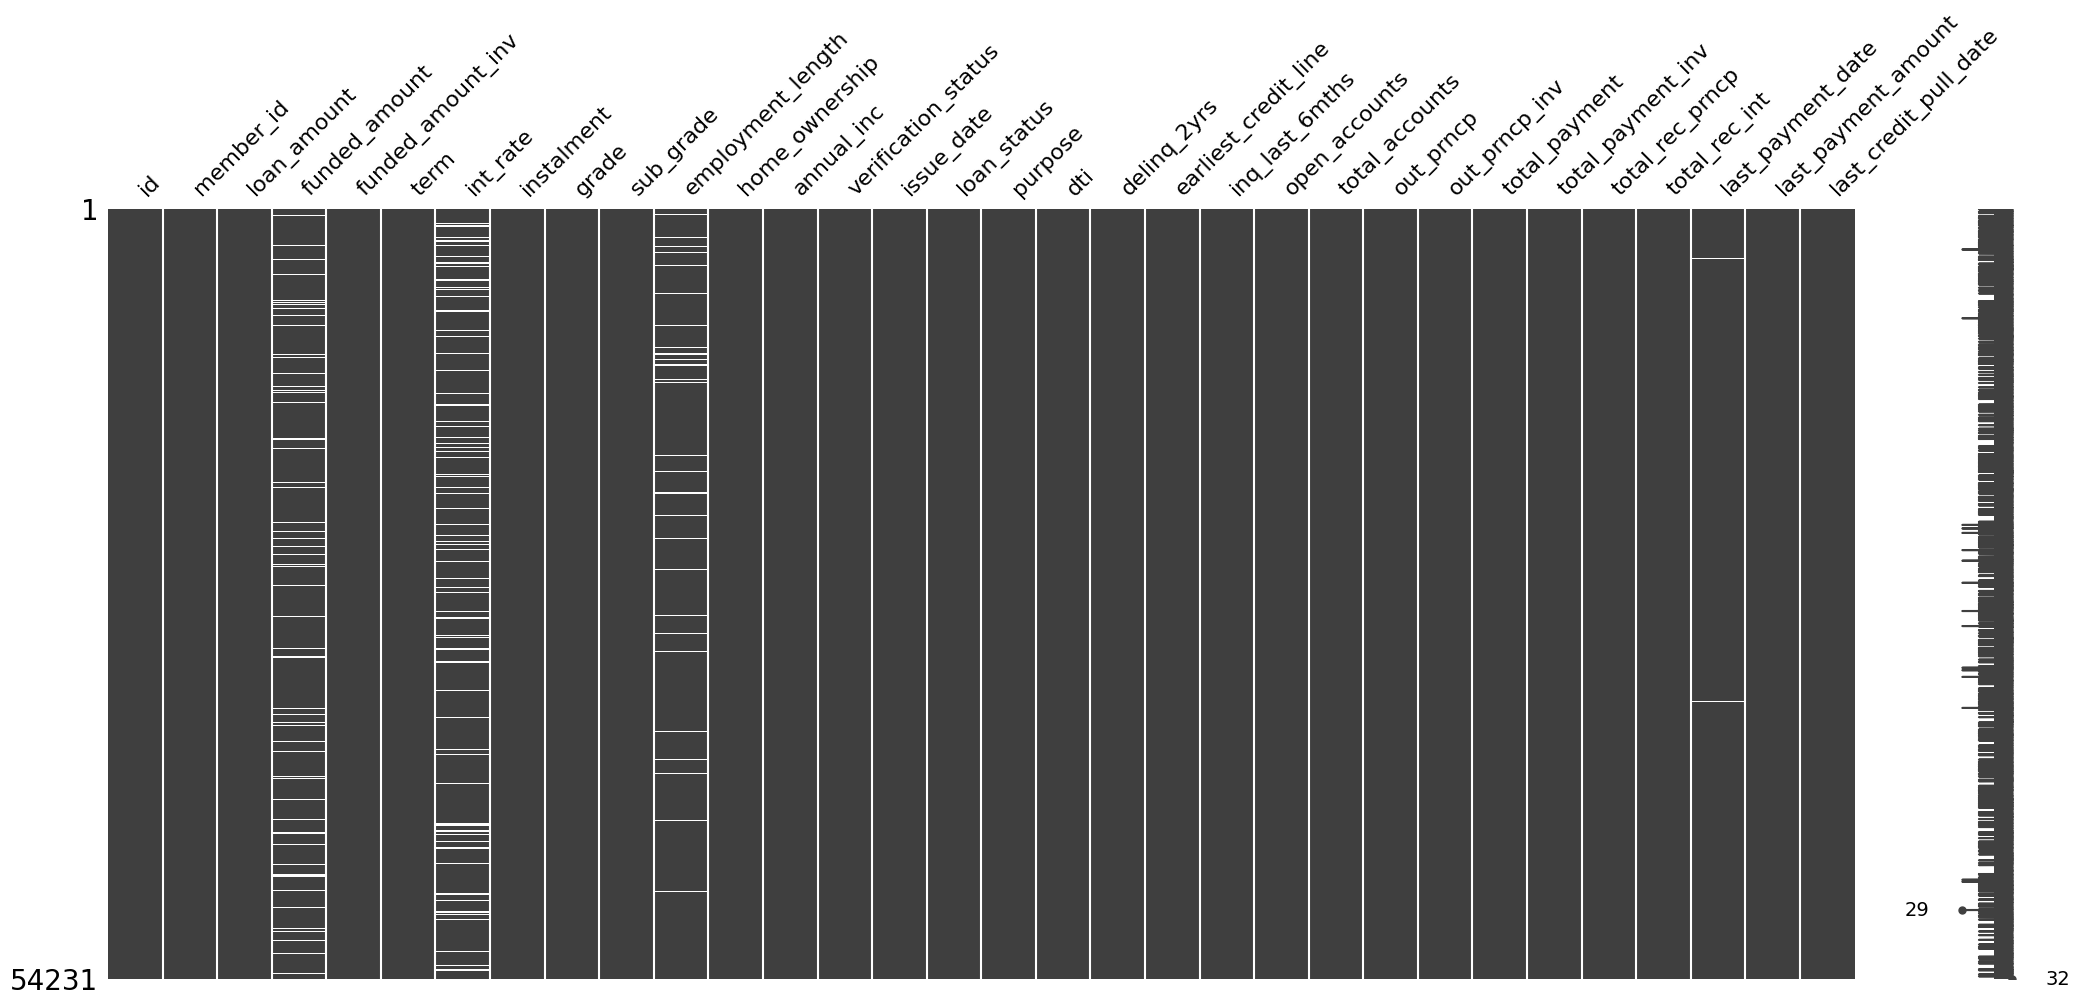

In [29]:
# Visualise missing values
plots.visualise_missing_values()

### B. Check for Normality
Use the __Plotter__ class to create histograms and Q-Q plots for the variables with missing data. This will help to visualise and understand which variabels are skewed and hence help decide whether to impute the mean or median.

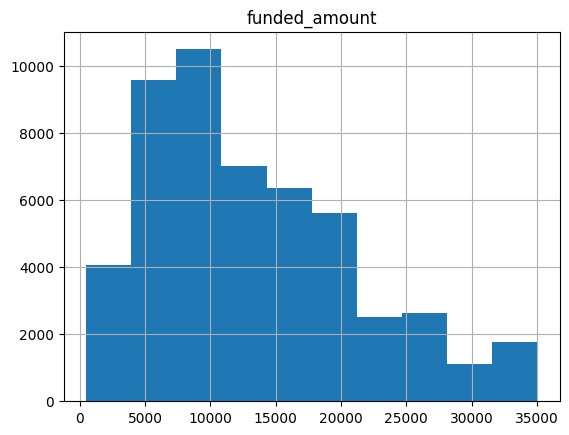

In [31]:
# Histogram
# Check if data is skewed before imputing values
plots.hist_to_check_normality()

In [ ]:
# Q-Q Plot
# Identify whether or not to impute mean, median or mode.
plots.qqplot_to_check_normality()

### C. Impute Mean and Median Values
Now, it is time to input the mean and median values in place of the remaining missing values. 

In [ ]:
# Impute the median for variables with remaining missing values of your choice using:
DataFrameTransform_data.median_for_missing_values()

In [ ]:
# Impute the mean for variables with remaining missing values of your choice using:
DataFrameTransform_data.mean_for_missing_values()

### D. Remove Remaining Misisng Values and Create a CSV File

In [ ]:
# Drop rows that contain missing values
DataFrameTransform_data.drop_missing_value_rows()

In [ ]:
# Create a csv file for the newly cleaned data 
cleaned_data = DataFrameTransform_data.data
cleaned_data.to_csv('cleaned_data', index = False)

## 5. Skewness
This step carries out the final checks and changes for the data before the data can be used for analysis and visualisation.

In [38]:
# Read the newly created csv file
cleaned_data_final = pd.read_csv('cleaned_data.csv')
cleaned_data_final.info()

# Doing this step means that I don't need to keep running the previous code to obtain this data as it is already saved locally

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54151 entries, 0 to 54150
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     54151 non-null  int64  
 1   member_id              54151 non-null  int64  
 2   loan_amount            54151 non-null  int64  
 3   funded_amount          54151 non-null  float64
 4   funded_amount_inv      54151 non-null  float64
 5   term                   54151 non-null  int64  
 6   int_rate               54151 non-null  float64
 7   instalment             54151 non-null  float64
 8   grade                  54151 non-null  object 
 9   sub_grade              54151 non-null  object 
 10  employment_length      54151 non-null  int64  
 11  home_ownership         54151 non-null  object 
 12  annual_inc             54151 non-null  float64
 13  verification_status    54151 non-null  object 
 14  issue_date             54151 non-null  object 
 15  lo

In [39]:
# Create a new instance for the Plotter class
check_skewness = Plotter(cleaned_data_final)

### A. Missing Values
Check there are no more missing values in the remaining data using the matrix visualisation.

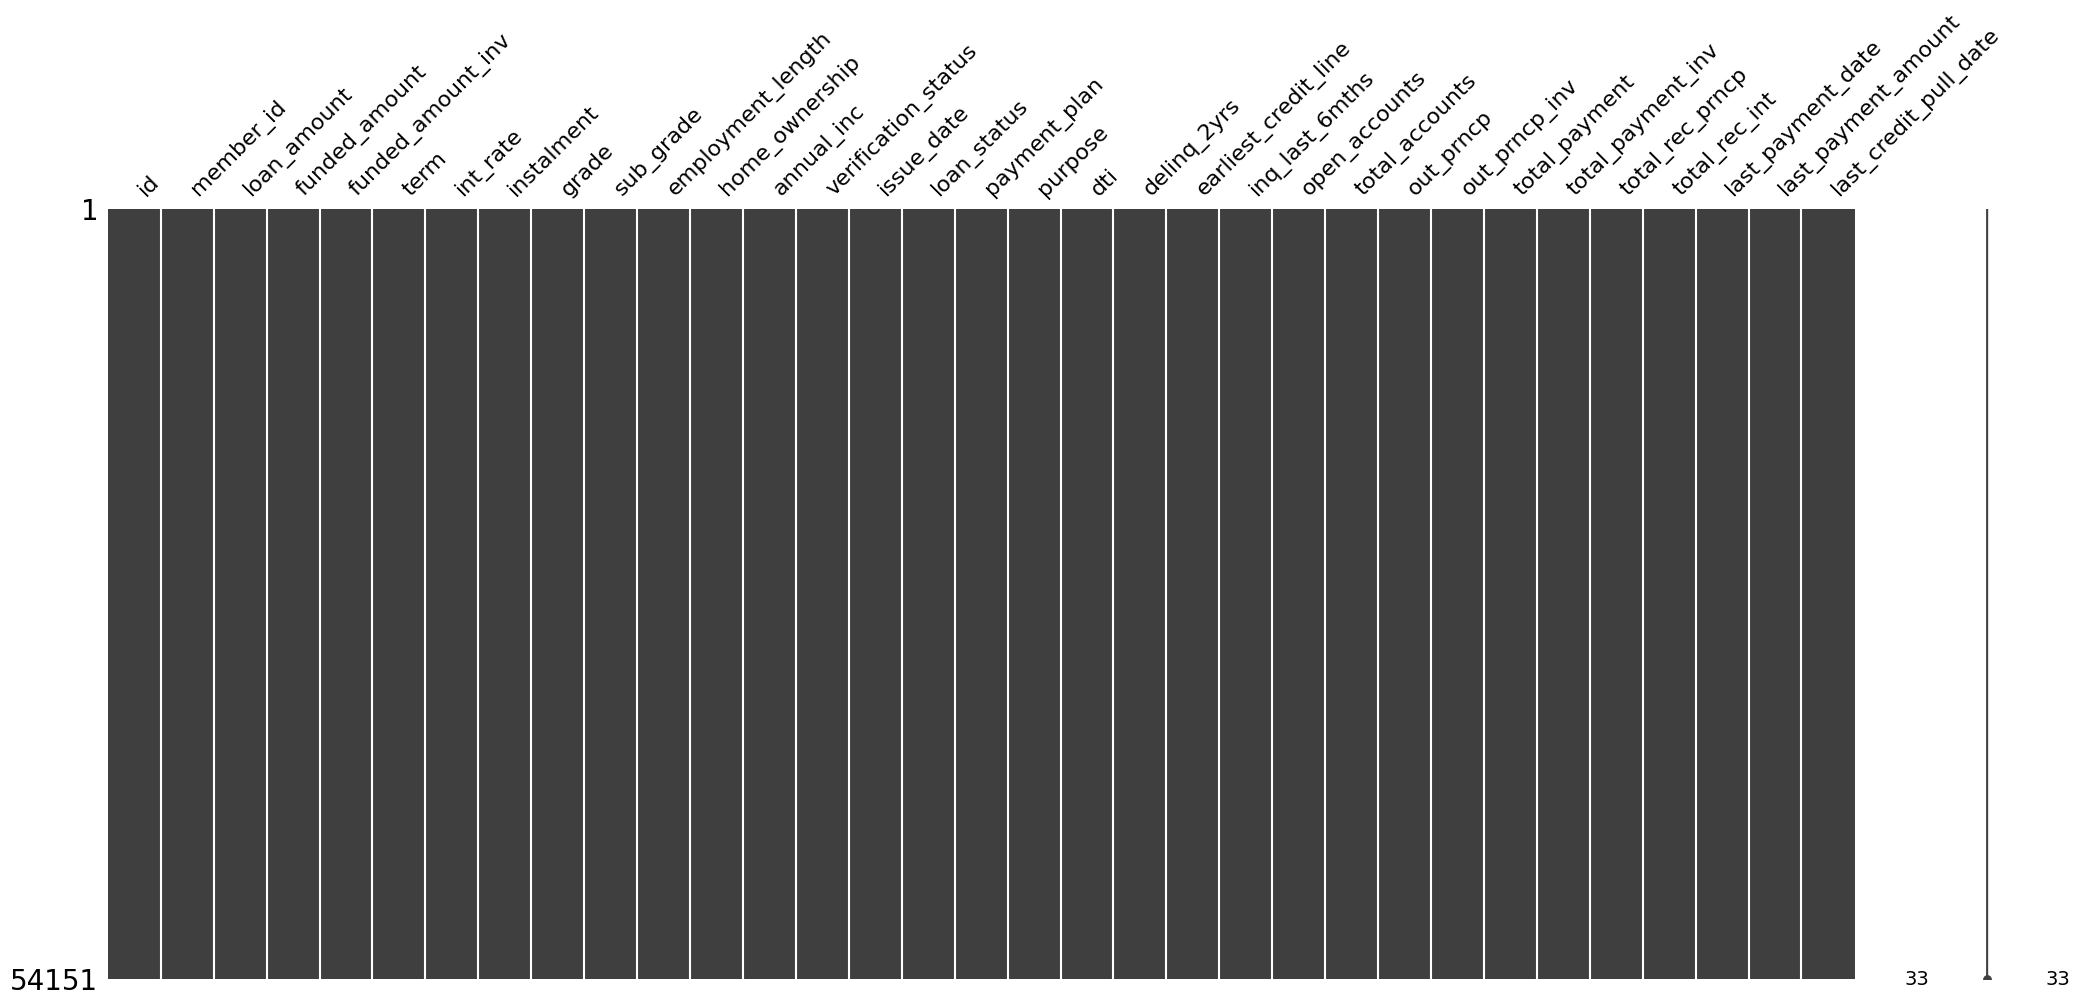

In [12]:
check_skewness.visualise_missing_values()
# As the data has been cleaned, there should be no misisng data values now

### B. Check Skewness
The importance of this step is to check which variables are skewed so that transformations can be tested and performed on these to make the data more normally distributed.

In [34]:
# Find the skew for the numerical variables
print(cleaned_data_final.select_dtypes('int64').skew())
print(cleaned_data_final.select_dtypes('float64').skew())

id                   2.370227
member_id            2.205248
loan_amount          0.804922
term                 0.679568
employment_length   -0.039508
delinq_2yrs          5.376385
inq_last_6mths       3.253523
open_accounts        1.059184
total_accounts       0.779040
dtype: float64
funded_amount          0.869634
funded_amount_inv      0.813376
int_rate               0.456620
instalment             0.996572
annual_inc             8.717500
dti                    0.189101
out_prncp              2.354051
out_prncp_inv          2.354471
total_payment          1.269875
total_payment_inv      1.257870
total_rec_prncp        1.262679
total_rec_int          2.204585
last_payment_amount    2.497220
dtype: float64


### C. Create a Skewness Threshold
The chosen skewness threshold for this data is between __-2 and +2__.

After reviewing the skew from section B, it is clear that the following variables fall outside the skewness threshold:
- __id__,                   2.370227
- __member_id__,            2.205248
- __delinq_2yrs__,          5.376385
- __inq_last_6mths__,       3.253523
- __annual_inc__,             8.717500
- __out_prncp__,              2.354051
- __out_prncp_inv__,          2.354471
- __total_rec_int__,          2.204585
- __last_payment_amount__,    2.497220

### D. Decide How to Normalise the Data
There are 3 different ways that we can transform the data so that it becomes closer to a normal distribution. In this, I will look into the affects of each of these transformations and determine the best one for each skewed variable.

#### 1. Log Transformation

In [ ]:
check_skewness.log_visualise()

- __delinq_2yrs__ -> 5.415423 (higher)
- __inq_last_6mths__ -> 1.971073 (lower)
- __annual_inc__ -> 0.139203 (perfect!) BEST
- __out_prncp__ -> 0.574792 (nearly perfect!) BEST
- __out_prncp_inv__ -> 0.574866 (nearly perfect!) BEST
- __total_rec_int__ -> -0.562533 (slight left skew but perfect!)
- __last_payment_amount__ -> 0.128038 (nearly perfect!)

#### 2. Box-Cox Transformation

In [ ]:
check_skewness.box_cox_visualise()

- __annual_inc__ -> -0.01 (perfect!)
- __total_rec_int__ -> 0.00 (perfect!)

The rest of variables did not work due to the values not being strictly +ve

#### 3. Yeojohnson Transformation

In [ ]:
check_skewness.yeojohnson_visualise()

- __delinq_2yrs__ -> 1.87 (lower) BEST
- __inq_last_6mths__ -> 0.25 (lower) BEST
- __out_prncp__ -> 0.53 (lower) BEST but not that different from log
- __out_prncp_inv__ -> 0.53 (lower) BEST but same as above
- __last_payment_amount__ -> 0.00 BEST

### E. Apply Normalisation Transformations
Now that I have an understanding of which transformations suit each variable best, they can finally be applied.

In [44]:
# Create a new instance for the DataFrameTransform class so that the transformations can be applied.
data_to_be_normalised = DataFrameTransform(cleaned_data_final)

The transformations to be applied for each variable are:
1. __Log__ transformations to
    - out_prncp
    - out_prncp_inv
    - last_payment_amount
2. __Box-Cox__ transformation to
    - annual_inc
    - total_rec_int
3. __Yeojohnson__ transformation to 
    - delinq_2yrs
    - inq_last_6mths

#### 1. Applying Log Transformation

In [ ]:
data_to_be_normalised.log_transformation()

#### 2. Applying Box-Cox Transformation

In [ ]:
data_to_be_normalised.box_cox_transformation()

#### 3. Applying Yeojohnson Transformation

In [ ]:
data_to_be_normalised.yeojohnson_transformation()

### F. Create CSV for Normalised Data

In [ ]:
normalised_data = data_to_be_normalised.data
normalised_data.to_csv('normalised_data.csv', index = False)

## 6. Outliers
This is one of the final steps of EDA. Removing outliers is important as they can cause inaacurate findings from the data in the analysis and visualisation step.

### A. Load Normalised Data

In [ ]:
loan_normalised = pd.read_csv('normalised_data.csv')

### B. Remove Columns
This stage removes the columns that when not normalised but the data was still skewed and did not add value to the overall analysis.

In [ ]:

loan_normalised.drop(columns = ['id', 'member_id'], inplace=True)
loan_normalised.head(10)

### C. Create New Plotter Instance

In [ ]:
check_outliers = Plotter(loan_normalised)

### D. Box Plot to Check Outliers

In [ ]:
check_outliers.boxplot_for_outliers()

Can see the outliers, which are indicated by circles on:
- loan_amount
- funded_amount
- funded_amount_inv
- int_rate
- instalment
- annual_inc
- dti
- delinq_2yrs
- open_accounts
- total_accounts
- total_payment
- total_payment_inv
- total_rec_prncp
- total_rec_int
- last_payment_amount

### E. Remove Outliers with IQR
For this part, I will need to create a new instance for the __DataFrameTransform__ class in order to apply the changes.

In [ ]:
# Create instance for DataFrameTransform of normalised data
transform_outliers = DataFrameTransform(loan_normalised)

In [ ]:
transform_outliers.IQR_for_outliers()

This indicates that the variables with outliers to be removed are:
- dti -> remove due to there only being 60 & the values being a lot higher than the Q3
- total_rec_int -> remove due to low number
- last_payment_amount -> remove due to low number

In [ ]:
transform_outliers.remove_outliers_IQR()

### F. Check the Outliers Now

In [ ]:
# Create new instance
check_outliers_final = Plotter(transform_outliers.data)

# Plot boxplot
check_outliers_final.boxplot_for_outliers()

### G. Create CSV File

In [ ]:
outliers_removed = transform_outliers.data
outliers_removed.to_csv('removed_outliers_data.csv', index = False)

## 7. Correlation
Multi-collinearity introduces bias to the data, which can cause results to be inaccurate, hence any correlations need to be removed prior to analysis and visualisation.

### A. Load Data

In [46]:
removed_outliers= pd.read_csv('removed_outliers_data.csv')

### B. Create a Correlation Matrix

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(removed_outliers.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

### C. Correlation Threshold

Use a correlation threshold of > 0.8 and < -0.2 for the above matrix.

The columns to be removed based on high correlation are:
- funded_amount
- funded_amount_inv
- instalment
- total_payment
- total_payment_inv
- out_prncp
- out_prncp_inv

### D. Drop Highly Correlated Columns

In [ ]:
removed_outliers.drop(columns = ['funded_amount', 'funded_amount_inv', 'instalment', 'total_payment', 'total_payment_inv', 'out_prncp', 'out_prncp_inv'], inplace = True)
removed_outliers.drop(columns = ['payment_plan'], inplace = True)

### E. Create CSV File

In [ ]:
removed_outliers.to_csv('Completed EDA.csv', index = False)